In [1]:
#Importing dependencies

import numpy as np
import pandas as pd
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report
import warnings
warnings.simplefilter(action = 'ignore',category = pd.errors.SettingWithCopyWarning)

In [2]:
#Loading datasets

dt_fake = pd.read_csv("Fake.csv")
dt_true = pd.read_csv("True.csv")

In [3]:
#First five rows of fake data

dt_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
#First five rows of true data

dt_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
#Adding a column to both data --> 'class'

dt_fake['class'] = 0
dt_true['class'] = 1

In [6]:
#Finding rows and columns of data

dt_fake.shape , dt_true.shape

((23481, 5), (21417, 5))

In [7]:
#Selecting last 10 rows for manual testing as well as dropping from fake data

dt_fake_man_test = dt_fake.tail(10)
for i in range(23480,23470,-1):
    dt_fake.drop([i],axis = 0,inplace = True)

    
#Selecting last 10 rows for manual testing as well as dropping from true data

dt_true_man_test = dt_true.tail(10)
for i in range(21416,21406,-1):
    dt_true.drop([i],axis = 0,inplace = True)

In [8]:
#Finding rows and columns of data after dropping

dt_fake.shape , dt_true.shape

((23471, 5), (21407, 5))

In [9]:
#Adding a column to manual testing data --> 'class'

dt_fake_man_test['class'] = 0
dt_true_man_test['class'] = 1

In [10]:
#Viewing of man_test_fake data

dt_fake_man_test.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [11]:
#Viewing of man_test_true data

dt_true_man_test.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [12]:
#Merging true and fake data

dt_merge = pd.concat([dt_fake,dt_true],axis = 0)
dt_merge.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [13]:
#Dropping unnecessary columns 

data = dt_merge.drop(['title','subject','date'],axis = 1)

In [14]:
#Identifying missing values

data.isnull().sum()

text     0
class    0
dtype: int64

In [15]:
#Random shuffling the data

data = data.sample(frac = 1)

In [16]:
#First five rows after shuffling data

data.head()

,text,class
13041,BEIJING (Reuters) - China said on Wednesday it...,1
15680,The hate for our law enforcement is at an all ...,0
6591,Ted Cruz is just one night away from losing th...,0
16000,NJ Governor Chris Christie was being heckled d...,0
13062,WASHINGTON (Reuters) - President Donald Trump ...,1


In [17]:
#Reset the index as well as dropping present index

data.reset_index(inplace = True)
data.drop(['index'],axis = 1,inplace = True)

In [18]:
#First five rows after reset the index

data.head()

,text,class
0,BEIJING (Reuters) - China said on Wednesday it...,1
1,The hate for our law enforcement is at an all ...,0
2,Ted Cruz is just one night away from losing th...,0
3,NJ Governor Chris Christie was being heckled d...,0
4,WASHINGTON (Reuters) - President Donald Trump ...,1


In [19]:
#Text cleaning

def txt_cln(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+\www\.\S+','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\n','',text)
    text = re.sub('\w*\d\w*','',text)
    return text

In [20]:
#Applying the function

data['text'] = data['text'].apply(txt_cln)

In [21]:
#Assigning independent and dependent variables

x = data['text']
y = data['class']

In [22]:
#Splitting the data 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [23]:
#Tf-Idf vectorization

from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [59]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [50]:
#Prediction

pred_lr = LR.predict(xv_test)

In [51]:
#Accuracy_score

LR.score(xv_test,y_test)

0.9862745098039216

In [48]:
#Classification report 

print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5861
           1       0.98      0.99      0.99      5359

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [28]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [29]:
#Prediction

pred_dt = DT.predict(xv_test)

In [30]:
#Accuracy_score

DT.score(xv_test,y_test)

0.9955436720142602

In [31]:
#Classification report 

print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5861
           1       1.00      0.99      1.00      5359

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [32]:
#Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(random_state = 0)
GB.fit(xv_train,y_train)

GradientBoostingClassifier(random_state=0)

In [33]:
#Prediction

pred_gb = GB.predict(xv_test)

In [34]:
#Accuracy_score

GB.score(xv_test,y_test)

0.995632798573975

In [35]:
#Classification report 

print(classification_report(y_test,pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5861
           1       0.99      1.00      1.00      5359

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [36]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state = 0)
RF.fit(xv_train,y_train)

RandomForestClassifier(random_state=0)

In [37]:
#Prediction

pred_rf = RF.predict(xv_test)

In [38]:
#Accuracy_score

RF.score(xv_test,y_test)

0.9887700534759358

In [39]:
#Classification report 

print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5861
           1       0.99      0.99      0.99      5359

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



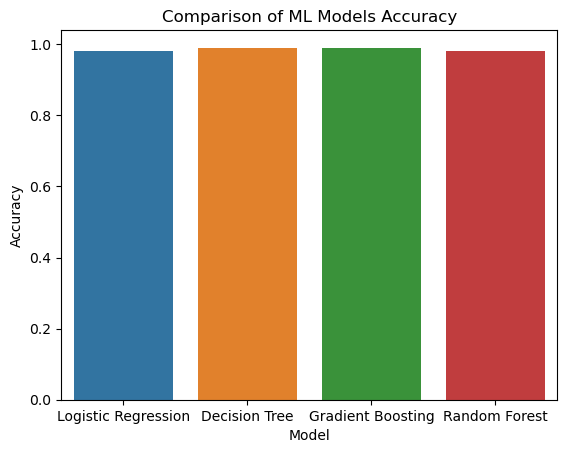

In [58]:
#Visualizing the four models accuracy

model_names = ['Logistic Regression','Decision Tree','Gradient Boosting','Random Forest']
accuracy_scores = [0.98,0.99,0.99,0.98]
acc_vis = pd.DataFrame({'Model': model_names,'Accuracy': accuracy_scores})
sns.barplot(data = acc_vis,x = 'Model',y = 'Accuracy')
plt.title('Comparison of ML Models Accuracy')
plt.show()

In [42]:
#Function in py code

def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(txt_cln)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GB = GB.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)
    return print("\nLR Prediction: {} \nDT Prediction: {} \nGB Prediction: {} \nRF Prediction: {}".format(output_lable(pred_LR[0]),
                                                                                                           output_lable(pred_DT[0]),
                                                                                                           output_lable(pred_GB[0]),
                                                                                                           output_lable(pred_RF[0])))
                                                                                                         

In [43]:
#Input

news = str(input())
manual_testing(news)

Pope Francis used his annual Christmas Day message to rebuke Donald Trump without even mentioning his name. The Pope delivered his message just days after members of the United Nations condemned Trump s move to recognize Jerusalem as the capital of Israel. The Pontiff prayed on Monday for the  peaceful coexistence of two states within mutually agreed and internationally recognized borders. We see Jesus in the children of the Middle East who continue to suffer because of growing tensions between Israelis and Palestinians,  Francis said.  On this festive day, let us ask the Lord for peace for Jerusalem and for all the Holy Land. Let us pray that the will to resume dialogue may prevail between the parties and that a negotiated solution can finally be reached. The Pope went on to plead for acceptance of refugees who have been forced from their homes, and that is an issue Trump continues to fight against. Francis used Jesus for which there was  no place in the inn  as an analogy. Today, as 

In [44]:
#Input

news = str(input())
manual_testing(news)

SEATTLE/WASHINGTON (Reuters) - President Donald Trump called on the U.S. Postal Service on Friday to charge â€œmuch moreâ€ to ship packages for Amazon (AMZN.O), picking another fight with an online retail giant he has criticized in the past.     â€œWhy is the United States Post Office, which is losing many billions of dollars a year, while charging Amazon and others so little to deliver their packages, making Amazon richer and the Post Office dumber and poorer? Should be charging MUCH MORE!â€ Trump wrote on Twitter.  The presidentâ€™s tweet drew fresh attention to the fragile finances of the Postal Service at a time when tens of millions of parcels have just been shipped all over the country for the holiday season.  The U.S. Postal Service, which runs at a big loss, is an independent agency within the federal government and does not receive tax dollars for operating expenses, according to its website.  Package delivery has become an increasingly important part of its business as the 